In [1]:
#https://www.kaggle.com/c/dogs-vs-cats/
#https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from time import time
from keras.callbacks import TensorBoard
from keras_tqdm import TQDMNotebookCallback

from keras import backend as K
K.set_image_dim_ordering('th')

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 150, 150)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
          optimizer='rmsprop',
          metrics=['accuracy'])


Using TensorFlow backend.


In [2]:
tensorboard = TensorBoard(log_dir="./logs/{}".format(time()))

batch_size = 20

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'data/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'data/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 18002 images belonging to 2 classes.
Found 6999 images belonging to 2 classes.


In [3]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=800 // batch_size,
        callbacks=[tensorboard,TQDMNotebookCallback()])


Epoch 1/100


100/100 [==============================] - 59s 591ms/step - loss: 0.7095 - acc: 0.5160 - val_loss: 0.6737 - val_acc: 0.6262
Epoch 2/100


100/100 [==============================] - 41s 409ms/step - loss: 0.6829 - acc: 0.5865 - val_loss: 0.6827 - val_acc: 0.5625
Epoch 3/100


100/100 [==============================] - 41s 407ms/step - loss: 0.6555 - acc: 0.6365 - val_loss: 0.6323 - val_acc: 0.6375
Epoch 4/100


100/100 [==============================] - 41s 406ms/step - loss: 0.6425 - acc: 0.6440 - val_loss: 0.5780 - val_acc: 0.7225
Epoch 5/100


100/100 [==============================] - 49s 485ms/step - loss: 0.6283 - acc: 0.6710 - val_loss: 0.5601 - val_acc: 0.6975
Epoch 6/100


100/100 [==============================] - 41s 412ms/step - loss: 0.6207 - acc: 0.6725 - val_loss: 0.5515 - val_acc: 0.7275
Epoch 7/100


100/100 [==============================] - 42s 417ms/step - loss: 0.6062 - acc: 0.6900 - val_loss: 0.5639 - val_acc: 0.7063
Epoch 8/100


100/100 [==============================] - 41s 413ms/step - loss: 0.6072 - acc: 0.6765 - val_loss: 0.6006 - val_acc: 0.6950
Epoch 9/100


100/100 [==============================] - 37s 373ms/step - loss: 0.6089 - acc: 0.6795 - val_loss: 0.5886 - val_acc: 0.6821
Epoch 10/100


100/100 [==============================] - 19s 193ms/step - loss: 0.5587 - acc: 0.7230 - val_loss: 0.5213 - val_acc: 0.7525
Epoch 11/100


100/100 [==============================] - 18s 177ms/step - loss: 0.5898 - acc: 0.6965 - val_loss: 0.6715 - val_acc: 0.7038
Epoch 12/100


100/100 [==============================] - 18s 178ms/step - loss: 0.5648 - acc: 0.7295 - val_loss: 0.5166 - val_acc: 0.7412
Epoch 13/100


100/100 [==============================] - 18s 178ms/step - loss: 0.5811 - acc: 0.7010 - val_loss: 0.4870 - val_acc: 0.7813
Epoch 14/100


100/100 [==============================] - 18s 178ms/step - loss: 0.5517 - acc: 0.7325 - val_loss: 0.5006 - val_acc: 0.7450
Epoch 15/100


100/100 [==============================] - 18s 177ms/step - loss: 0.5427 - acc: 0.7305 - val_loss: 0.5855 - val_acc: 0.7238
Epoch 16/100


100/100 [==============================] - 18s 177ms/step - loss: 0.5455 - acc: 0.7390 - val_loss: 0.6811 - val_acc: 0.6525
Epoch 17/100


100/100 [==============================] - 18s 178ms/step - loss: 0.5492 - acc: 0.7325 - val_loss: 0.4940 - val_acc: 0.7713
Epoch 18/100


100/100 [==============================] - 18s 177ms/step - loss: 0.5437 - acc: 0.7330 - val_loss: 0.4909 - val_acc: 0.7635
Epoch 19/100


100/100 [==============================] - 19s 191ms/step - loss: 0.5219 - acc: 0.7445 - val_loss: 0.4867 - val_acc: 0.7538
Epoch 20/100


100/100 [==============================] - 18s 176ms/step - loss: 0.5188 - acc: 0.7615 - val_loss: 0.4889 - val_acc: 0.7437
Epoch 21/100


100/100 [==============================] - 19s 187ms/step - loss: 0.5319 - acc: 0.7490 - val_loss: 0.4486 - val_acc: 0.7900
Epoch 22/100


100/100 [==============================] - 18s 177ms/step - loss: 0.5056 - acc: 0.7646 - val_loss: 0.5012 - val_acc: 0.7700
Epoch 23/100


100/100 [==============================] - 18s 177ms/step - loss: 0.5006 - acc: 0.7840 - val_loss: 0.4519 - val_acc: 0.7975
Epoch 24/100


100/100 [==============================] - 18s 179ms/step - loss: 0.4886 - acc: 0.7665 - val_loss: 0.4768 - val_acc: 0.7900
Epoch 25/100


100/100 [==============================] - 18s 178ms/step - loss: 0.5253 - acc: 0.7565 - val_loss: 0.4755 - val_acc: 0.7550
Epoch 26/100


100/100 [==============================] - 18s 180ms/step - loss: 0.5013 - acc: 0.7585 - val_loss: 0.4999 - val_acc: 0.7700
Epoch 27/100


100/100 [==============================] - 18s 180ms/step - loss: 0.5130 - acc: 0.7485 - val_loss: 0.5108 - val_acc: 0.7509
Epoch 28/100


100/100 [==============================] - 19s 193ms/step - loss: 0.5021 - acc: 0.7740 - val_loss: 0.5219 - val_acc: 0.7638
Epoch 29/100


100/100 [==============================] - 18s 179ms/step - loss: 0.4945 - acc: 0.7750 - val_loss: 0.4594 - val_acc: 0.7713
Epoch 30/100


100/100 [==============================] - 18s 177ms/step - loss: 0.5016 - acc: 0.7785 - val_loss: 0.4532 - val_acc: 0.7925
Epoch 31/100


100/100 [==============================] - 18s 178ms/step - loss: 0.4818 - acc: 0.7835 - val_loss: 0.5272 - val_acc: 0.7562
Epoch 32/100


100/100 [==============================] - 18s 178ms/step - loss: 0.5080 - acc: 0.7525 - val_loss: 0.4638 - val_acc: 0.7863
Epoch 33/100


100/100 [==============================] - 18s 178ms/step - loss: 0.4881 - acc: 0.7765 - val_loss: 0.4359 - val_acc: 0.7988
Epoch 34/100


100/100 [==============================] - 18s 178ms/step - loss: 0.4899 - acc: 0.7845 - val_loss: 0.4981 - val_acc: 0.7538
Epoch 35/100


100/100 [==============================] - 18s 177ms/step - loss: 0.4978 - acc: 0.7715 - val_loss: 0.4366 - val_acc: 0.8010
Epoch 36/100


100/100 [==============================] - 18s 177ms/step - loss: 0.4947 - acc: 0.7810 - val_loss: 0.4504 - val_acc: 0.7788
Epoch 37/100


100/100 [==============================] - 19s 190ms/step - loss: 0.5099 - acc: 0.7680 - val_loss: 0.4522 - val_acc: 0.7925
Epoch 38/100


100/100 [==============================] - 18s 178ms/step - loss: 0.4826 - acc: 0.7715 - val_loss: 0.4641 - val_acc: 0.7900
Epoch 39/100


100/100 [==============================] - 18s 178ms/step - loss: 0.4704 - acc: 0.7885 - val_loss: 0.4497 - val_acc: 0.8013
Epoch 40/100


100/100 [==============================] - 18s 177ms/step - loss: 0.4641 - acc: 0.7855 - val_loss: 0.4736 - val_acc: 0.7988
Epoch 41/100


100/100 [==============================] - 18s 175ms/step - loss: 0.4699 - acc: 0.7875 - val_loss: 0.4314 - val_acc: 0.8000
Epoch 42/100


100/100 [==============================] - 18s 179ms/step - loss: 0.4895 - acc: 0.7790 - val_loss: 0.4817 - val_acc: 0.7963
Epoch 43/100


100/100 [==============================] - 18s 180ms/step - loss: 0.5102 - acc: 0.7780 - val_loss: 0.4340 - val_acc: 0.7925
Epoch 44/100


100/100 [==============================] - 18s 178ms/step - loss: 0.4831 - acc: 0.7880 - val_loss: 0.4570 - val_acc: 0.7922
Epoch 45/100


100/100 [==============================] - 18s 178ms/step - loss: 0.4853 - acc: 0.7750 - val_loss: 0.4159 - val_acc: 0.8062
Epoch 46/100


100/100 [==============================] - 19s 191ms/step - loss: 0.4545 - acc: 0.8030 - val_loss: 0.4019 - val_acc: 0.8187
Epoch 47/100


100/100 [==============================] - 18s 177ms/step - loss: 0.4422 - acc: 0.7960 - val_loss: 0.4593 - val_acc: 0.7913
Epoch 48/100


100/100 [==============================] - 18s 177ms/step - loss: 0.4929 - acc: 0.7775 - val_loss: 0.4638 - val_acc: 0.8038
Epoch 49/100


100/100 [==============================] - 18s 178ms/step - loss: 0.4610 - acc: 0.7960 - val_loss: 0.6390 - val_acc: 0.7488
Epoch 50/100


100/100 [==============================] - 18s 178ms/step - loss: 0.4629 - acc: 0.7945 - val_loss: 0.4229 - val_acc: 0.8075
Epoch 51/100


100/100 [==============================] - 18s 180ms/step - loss: 0.4724 - acc: 0.7905 - val_loss: 0.4127 - val_acc: 0.8288
Epoch 52/100


100/100 [==============================] - 18s 177ms/step - loss: 0.4691 - acc: 0.7970 - val_loss: 0.4810 - val_acc: 0.7788
Epoch 53/100


100/100 [==============================] - 18s 178ms/step - loss: 0.4392 - acc: 0.8070 - val_loss: 0.4908 - val_acc: 0.7947
Epoch 54/100


100/100 [==============================] - 18s 178ms/step - loss: 0.4853 - acc: 0.7860 - val_loss: 0.3880 - val_acc: 0.8313
Epoch 55/100


100/100 [==============================] - 19s 187ms/step - loss: 0.4252 - acc: 0.8115 - val_loss: 0.4445 - val_acc: 0.7937
Epoch 56/100


100/100 [==============================] - 17s 175ms/step - loss: 0.4440 - acc: 0.7930 - val_loss: 0.4619 - val_acc: 0.8063
Epoch 57/100


100/100 [==============================] - 18s 175ms/step - loss: 0.4640 - acc: 0.7915 - val_loss: 0.4425 - val_acc: 0.7900
Epoch 58/100


100/100 [==============================] - 18s 176ms/step - loss: 0.4710 - acc: 0.7985 - val_loss: 0.4559 - val_acc: 0.7850
Epoch 59/100


100/100 [==============================] - 17s 174ms/step - loss: 0.4751 - acc: 0.7835 - val_loss: 0.3972 - val_acc: 0.8163
Epoch 60/100


100/100 [==============================] - 17s 173ms/step - loss: 0.4741 - acc: 0.7950 - val_loss: 0.3684 - val_acc: 0.8500
Epoch 61/100


100/100 [==============================] - 18s 176ms/step - loss: 0.4467 - acc: 0.8045 - val_loss: 0.4676 - val_acc: 0.8100
Epoch 62/100


100/100 [==============================] - 19s 188ms/step - loss: 0.4455 - acc: 0.8050 - val_loss: 0.4713 - val_acc: 0.7847
Epoch 63/100


100/100 [==============================] - 18s 185ms/step - loss: 0.4669 - acc: 0.7930 - val_loss: 0.4132 - val_acc: 0.8100
Epoch 64/100


100/100 [==============================] - 19s 195ms/step - loss: 0.4295 - acc: 0.8230 - val_loss: 0.4165 - val_acc: 0.8212
Epoch 65/100


100/100 [==============================] - 20s 196ms/step - loss: 0.4634 - acc: 0.7930 - val_loss: 0.4140 - val_acc: 0.8075
Epoch 66/100


100/100 [==============================] - 18s 185ms/step - loss: 0.4489 - acc: 0.8020 - val_loss: 0.4053 - val_acc: 0.8263
Epoch 67/100


100/100 [==============================] - 18s 182ms/step - loss: 0.4437 - acc: 0.7985 - val_loss: 0.4292 - val_acc: 0.8187
Epoch 68/100


100/100 [==============================] - 18s 177ms/step - loss: 0.4365 - acc: 0.8010 - val_loss: 0.3747 - val_acc: 0.8438
Epoch 69/100


100/100 [==============================] - 18s 178ms/step - loss: 0.4441 - acc: 0.8060 - val_loss: 0.4193 - val_acc: 0.8263
Epoch 70/100


100/100 [==============================] - 18s 176ms/step - loss: 0.4475 - acc: 0.8125 - val_loss: 0.4287 - val_acc: 0.7985
Epoch 71/100


100/100 [==============================] - 18s 178ms/step - loss: 0.4286 - acc: 0.8095 - val_loss: 0.4595 - val_acc: 0.7788
Epoch 72/100


100/100 [==============================] - 18s 177ms/step - loss: 0.4439 - acc: 0.8090 - val_loss: 0.3955 - val_acc: 0.8250
Epoch 73/100


100/100 [==============================] - 18s 181ms/step - loss: 0.4239 - acc: 0.8180 - val_loss: 0.4437 - val_acc: 0.8250
Epoch 74/100


100/100 [==============================] - 18s 180ms/step - loss: 0.4537 - acc: 0.7965 - val_loss: 0.4421 - val_acc: 0.8175
Epoch 75/100


100/100 [==============================] - 18s 176ms/step - loss: 0.4492 - acc: 0.8085 - val_loss: 0.4468 - val_acc: 0.8037
Epoch 76/100


100/100 [==============================] - 18s 177ms/step - loss: 0.4422 - acc: 0.8115 - val_loss: 0.3759 - val_acc: 0.8275
Epoch 77/100


100/100 [==============================] - 18s 176ms/step - loss: 0.4345 - acc: 0.8140 - val_loss: 0.4122 - val_acc: 0.8338
Epoch 78/100


100/100 [==============================] - 18s 177ms/step - loss: 0.4622 - acc: 0.7925 - val_loss: 0.5126 - val_acc: 0.8063
Epoch 79/100


100/100 [==============================] - 18s 178ms/step - loss: 0.4327 - acc: 0.8175 - val_loss: 0.3883 - val_acc: 0.8310
Epoch 80/100


100/100 [==============================] - 18s 176ms/step - loss: 0.4228 - acc: 0.8175 - val_loss: 0.3964 - val_acc: 0.8350
Epoch 81/100


100/100 [==============================] - 17s 175ms/step - loss: 0.4329 - acc: 0.8130 - val_loss: 0.3688 - val_acc: 0.8525
Epoch 82/100


100/100 [==============================] - 18s 183ms/step - loss: 0.4238 - acc: 0.8230 - val_loss: 0.4865 - val_acc: 0.7813
Epoch 83/100


100/100 [==============================] - 18s 178ms/step - loss: 0.4396 - acc: 0.8165 - val_loss: 0.4205 - val_acc: 0.8013
Epoch 84/100


100/100 [==============================] - 18s 177ms/step - loss: 0.4079 - acc: 0.8310 - val_loss: 0.3932 - val_acc: 0.8363
Epoch 85/100


100/100 [==============================] - 18s 179ms/step - loss: 0.4057 - acc: 0.8265 - val_loss: 0.5272 - val_acc: 0.8175
Epoch 86/100


100/100 [==============================] - 18s 177ms/step - loss: 0.4486 - acc: 0.8050 - val_loss: 0.4673 - val_acc: 0.7950
Epoch 87/100


100/100 [==============================] - 17s 175ms/step - loss: 0.4186 - acc: 0.8210 - val_loss: 0.3646 - val_acc: 0.8400
Epoch 88/100


100/100 [==============================] - 18s 178ms/step - loss: 0.4153 - acc: 0.8205 - val_loss: 0.4232 - val_acc: 0.8110
Epoch 89/100


100/100 [==============================] - 18s 178ms/step - loss: 0.4262 - acc: 0.8185 - val_loss: 0.5803 - val_acc: 0.7550
Epoch 90/100


100/100 [==============================] - 18s 177ms/step - loss: 0.4408 - acc: 0.8195 - val_loss: 0.3644 - val_acc: 0.8450
Epoch 91/100


100/100 [==============================] - 18s 183ms/step - loss: 0.4157 - acc: 0.8270 - val_loss: 0.3649 - val_acc: 0.8388
Epoch 92/100


100/100 [==============================] - 18s 178ms/step - loss: 0.4456 - acc: 0.8120 - val_loss: 0.4261 - val_acc: 0.8263
Epoch 93/100


100/100 [==============================] - 18s 178ms/step - loss: 0.4148 - acc: 0.8225 - val_loss: 0.3723 - val_acc: 0.8600
Epoch 94/100


100/100 [==============================] - 18s 176ms/step - loss: 0.4056 - acc: 0.8210 - val_loss: 0.4493 - val_acc: 0.8075
Epoch 95/100


100/100 [==============================] - 18s 178ms/step - loss: 0.4121 - acc: 0.8180 - val_loss: 0.3952 - val_acc: 0.8375
Epoch 96/100


100/100 [==============================] - 18s 179ms/step - loss: 0.4144 - acc: 0.8300 - val_loss: 0.4212 - val_acc: 0.8137
Epoch 97/100


100/100 [==============================] - 18s 179ms/step - loss: 0.4200 - acc: 0.8285 - val_loss: 0.3556 - val_acc: 0.8461
Epoch 98/100


100/100 [==============================] - 18s 180ms/step - loss: 0.4375 - acc: 0.8230 - val_loss: 0.4236 - val_acc: 0.8400
Epoch 99/100


100/100 [==============================] - 18s 178ms/step - loss: 0.4235 - acc: 0.8200 - val_loss: 0.4766 - val_acc: 0.7938
Epoch 100/100


100/100 [==============================] - 18s 181ms/step - loss: 0.4011 - acc: 0.8360 - val_loss: 0.4345 - val_acc: 0.8138



In [4]:
model.save_weights('third_try.h5')  # always save your weights after training or during training

In [5]:
#model.load_weights('first_try.h5')

In [47]:
test_generator = test_datagen.flow_from_directory(
        'data/test',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=10,
        class_mode=None,
        shuffle=False)  # since we use binary_crossentropy loss, we need binary labels

filenames = test_generator.filenames
nb_samples = len(filenames)

probabilities = model.predict_generator(test_generator,steps = 50,verbose=True)

Found 12500 images belonging to 1 classes.
50/50 [==============================] - 2s 50ms/step


In [60]:
filenames = test_generator.filenames

In [49]:
predicted_class_indices =  [ np.around(x , decimals=0) for x in probabilities ]    #np.argmax(predict,axis=1)

In [50]:
labels = ['cat','dog']

In [51]:
predictions = [labels[int(k)] for k in predicted_class_indices]

In [61]:
filenames = filenames[:500]

In [62]:
len(filenames)

500

In [63]:
len(predict)

500

In [65]:
results = pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})

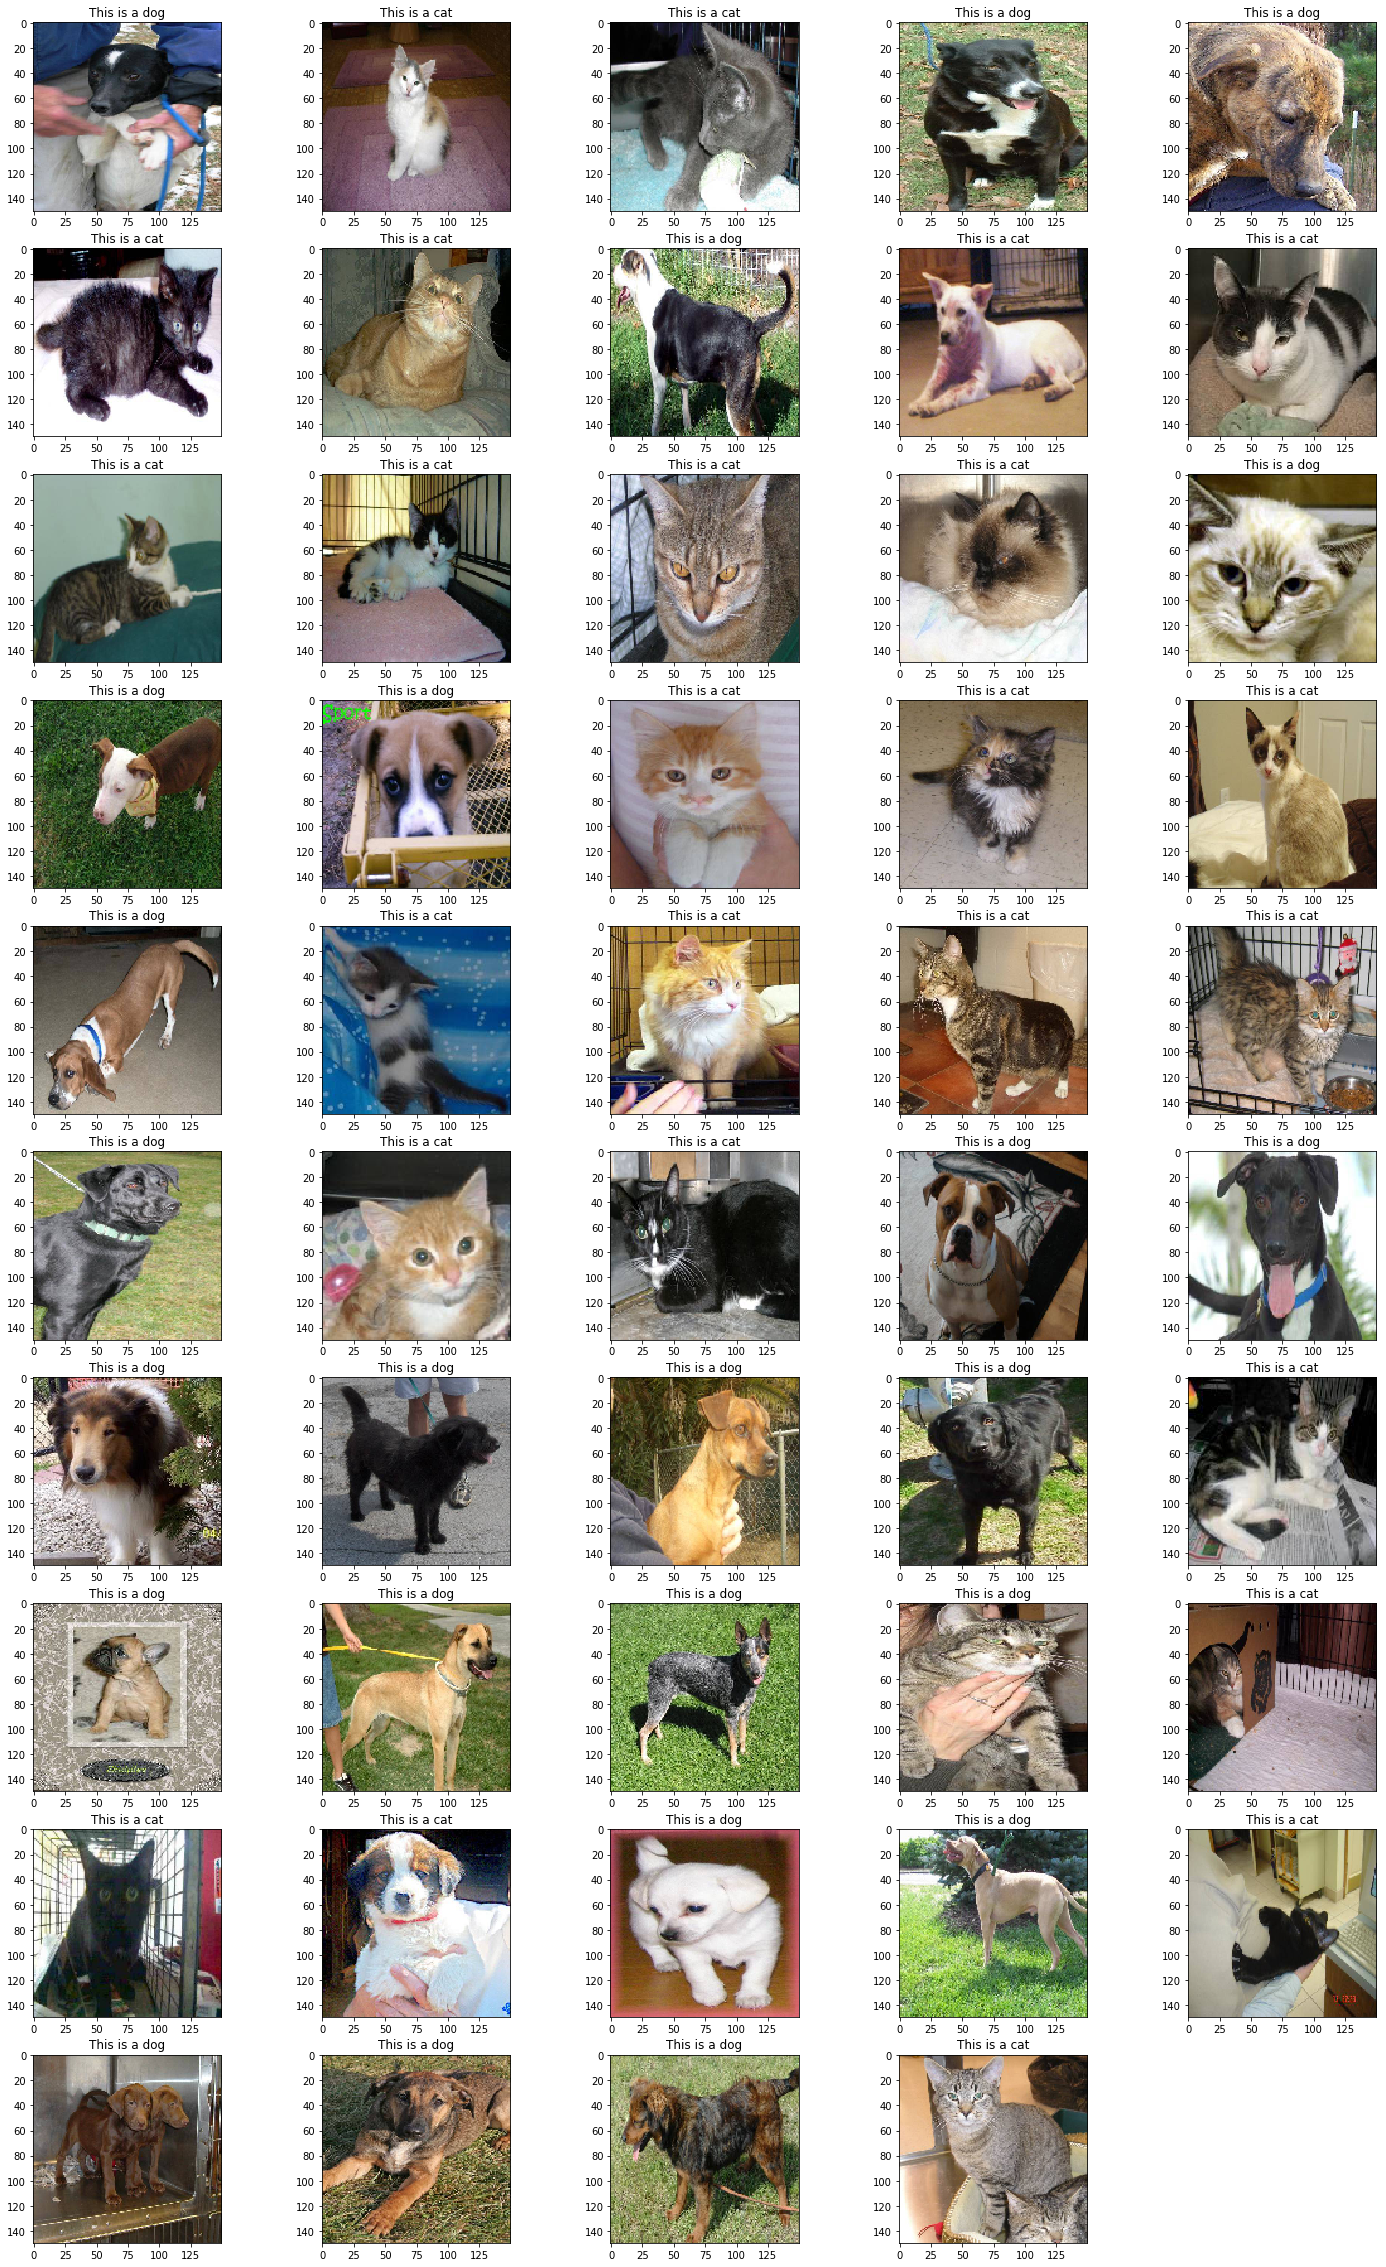

In [66]:
i = 0
columns = 5
plt.figure(figsize=(25,45))

for i in range(0, 49):
    img = load_img( './data/test/'+ results.iloc[i,0], target_size=(150, 150))
    plt.subplot(50 / columns + 1, columns, i + 1)
    plt.title('This is a ' + results.iloc[i,1])
    imgplot = plt.imshow(img)
    i += 1
    #if i % 10 == 0:
    #    break
plt.show()